#Predicting wheather the customer will subcribe to term deposit if contacted by agent or not 

In [212]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={"figure.figsize":(15,8)})
import warnings
warnings.filterwarnings('ignore')

>Data collection 

In [213]:
data=pd.read_csv("bank.csv",sep=';')

In [214]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [215]:
data.isnull().sum() 

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

>Exploratory data analysis

In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Let's test the impact of categorical features like 'housing' , 'loan' , 'marital' , 'education' , 'contact' , 'default','month','day_of_week','poutcome',job' on our target variable i.e 'y' through chi square test
>Null Hypothesis : The impact of variable is neglegible on target variable

>Alternate Hypothesis : The impact of variable is high on target variable

In [217]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [218]:
sd=pd.DataFrame()

In [219]:
sd=pd.concat([sd,data['job'],data['education'],data['housing'],data['loan'],data['contact'],data['day_of_week'],data['month'],data['poutcome'],data['marital'],data['default'],data['y']],axis=1)

In [220]:
for i in sd.columns:
  sd[i]=label.fit_transform(sd[i])

In [221]:
sd.head()

,job,education,housing,loan,contact,day_of_week,month,poutcome,marital,default,y
0,3,0,0,0,1,1,6,1,1,0,0
1,7,3,0,0,1,1,6,1,1,1,0
2,7,3,2,0,1,1,6,1,1,0,0
3,0,1,0,0,1,1,6,1,1,0,0
4,7,3,0,2,1,1,6,1,1,0,0


In [222]:
from sklearn.feature_selection import chi2
x=sd.drop('y',axis=1)
y=chi2(x,sd['y'])

In [223]:
y

(array([ 90.17553267, 167.607283  ,   4.97873433,   1.58700428,
        547.95830939,  10.23144457,   1.92728404,  98.23117432,
         27.79559829, 321.9229031 ]),
 array([2.17940641e-021, 2.46479591e-038, 2.56607498e-002, 2.07754662e-001,
        3.50059831e-121, 1.38066489e-003, 1.65055891e-001, 3.72282835e-023,
        1.34832527e-007, 5.52147578e-072]))

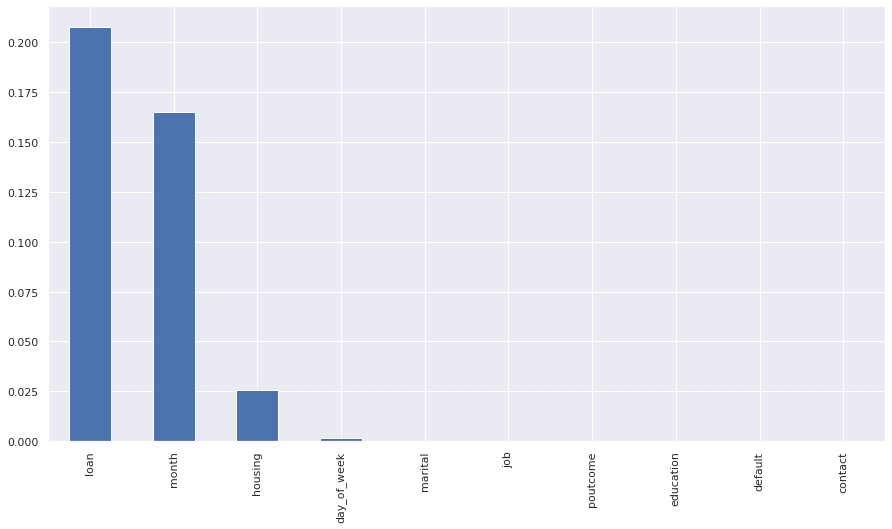

In [224]:
p_values = pd.Series(y[1],index = x.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

We can see here the chi_score of 'Loan' , 'Month','housing' feature is below 5% therefore it satisfies the null hypothesis that these features are independent of our target variable so we can remove them.



In [225]:
data.drop(["month",'loan','housing'],axis=1,inplace=True)

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   contact         41188 non-null  object 
 6   day_of_week     41188 non-null  object 
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   pdays           41188 non-null  int64  
 10  previous        41188 non-null  int64  
 11  poutcome        41188 non-null  object 
 12  emp.var.rate    41188 non-null  float64
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  euribor3m       41188 non-null  float64
 16  nr.employed     41188 non-null  float64
 17  y               41188 non-null 

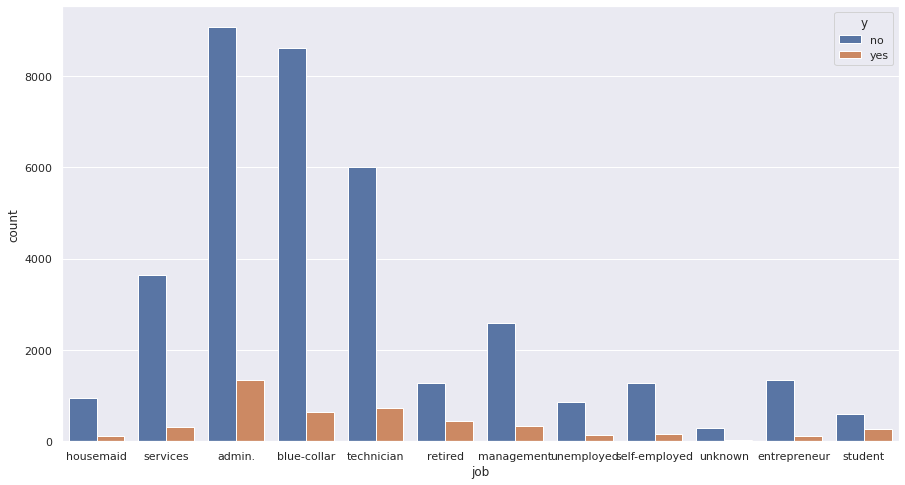

In [227]:
sns.countplot(data=data,x=data['job'],hue='y')

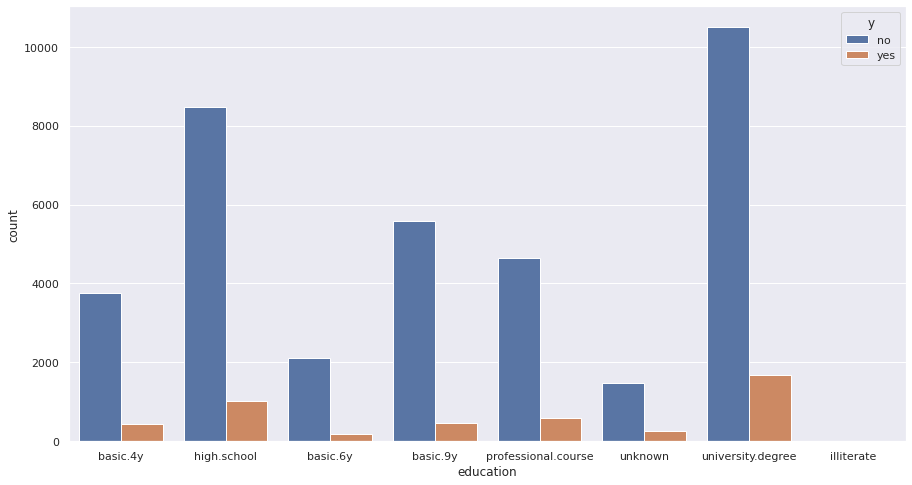

In [228]:
sns.countplot(data=data,x=data['education'],hue='y')

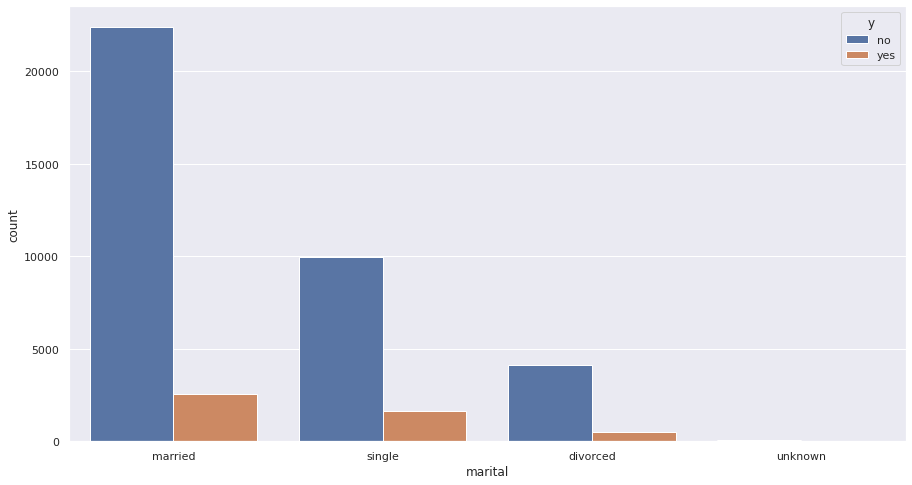

In [229]:
sns.countplot(data=data,x=data['marital'],hue='y')

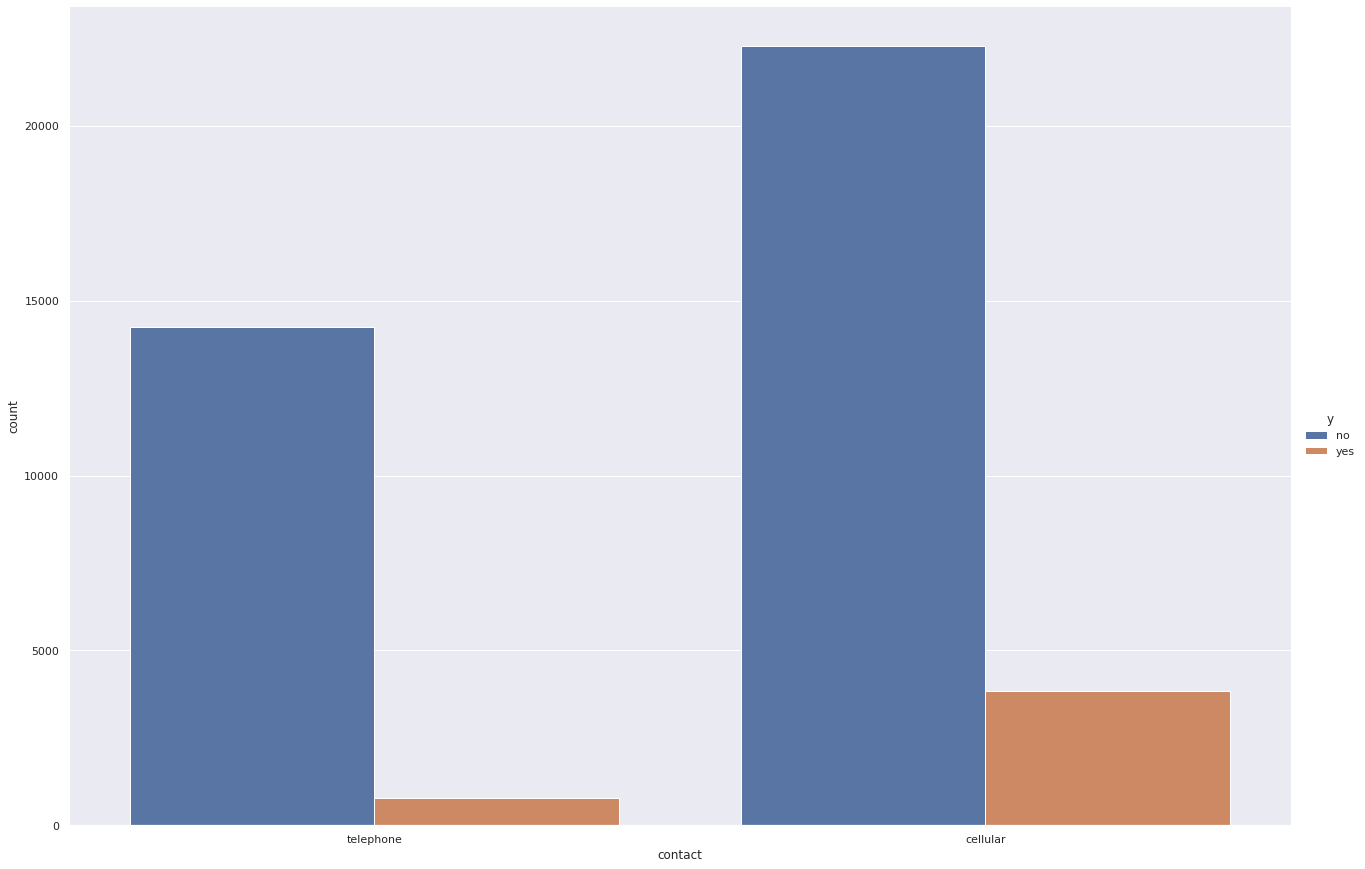

In [230]:
sns.factorplot(x="contact",hue="y",data=data,kind='count',size = 12,aspect = 1.5,legend_out=True)

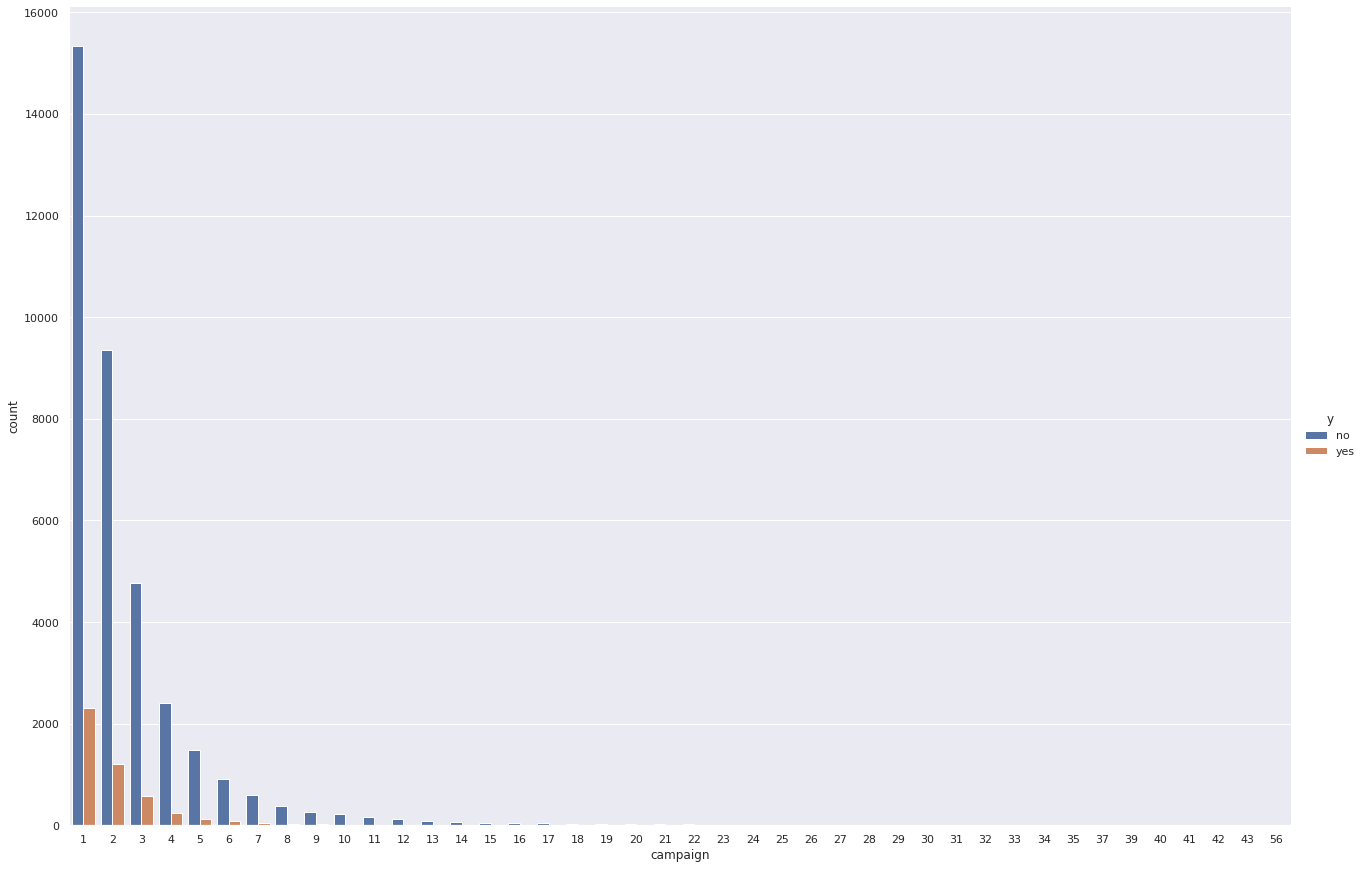

In [231]:
sns.factorplot(x="campaign",hue="y",data=data,kind='count',size = 12,aspect = 1.5,legend_out=True)

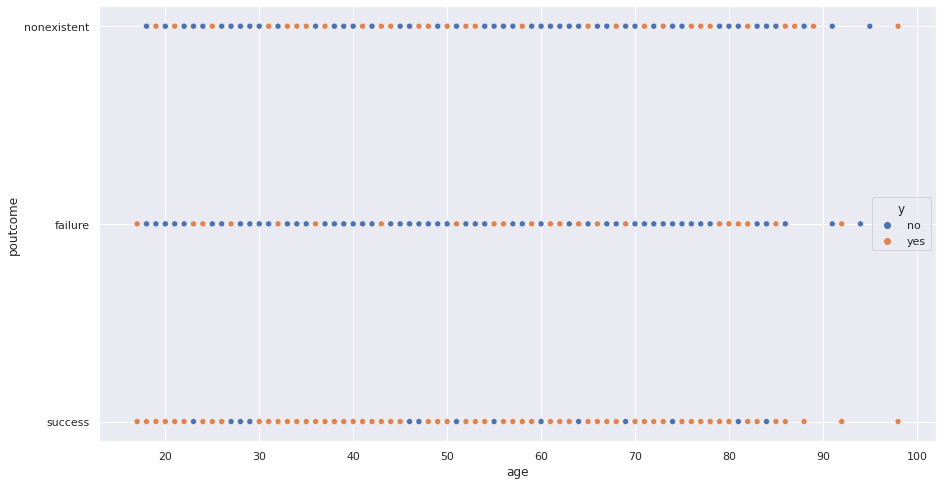

In [232]:
sns.scatterplot(x="age",y="poutcome",hue='y',data=data)

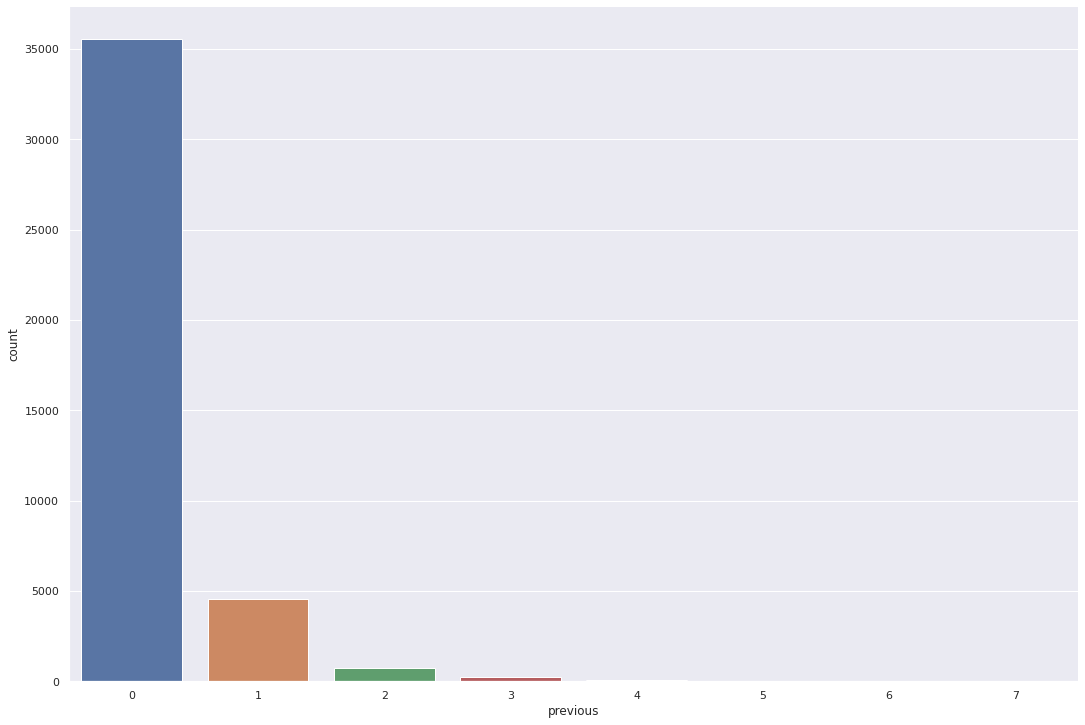

In [233]:
sns.factorplot(x='previous',data=data,kind='count',size = 10,aspect = 1.5,legend_out=True)

Data Preprocessing

In [234]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   contact         41188 non-null  object 
 6   day_of_week     41188 non-null  object 
 7   duration        41188 non-null  int64  
 8   campaign        41188 non-null  int64  
 9   pdays           41188 non-null  int64  
 10  previous        41188 non-null  int64  
 11  poutcome        41188 non-null  object 
 12  emp.var.rate    41188 non-null  float64
 13  cons.price.idx  41188 non-null  float64
 14  cons.conf.idx   41188 non-null  float64
 15  euribor3m       41188 non-null  float64
 16  nr.employed     41188 non-null  float64
 17  y               41188 non-null 

In [235]:
data["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [236]:
id=data[data['job']=='unknown'].index
data.drop(id,axis=0,inplace=True)

In [237]:
data.head()

,age,job,marital,education,default,contact,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,telephone,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,telephone,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,telephone,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,telephone,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,telephone,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [238]:
job=pd.get_dummies(data['job'])

In [239]:
data=pd.concat([data,job],axis=1)

In [240]:
ind=data[data['marital']=='unknown'].index

In [241]:
data.drop(ind,axis=0,inplace=True)

In [242]:
mar=pd.get_dummies(data['marital'])

In [243]:
data=pd.concat([data,mar],axis=1)

In [244]:
data.drop(['marital','job'],axis=1,inplace=True)

In [245]:
data["education"].value_counts()

university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
unknown                 1596
illiterate                18
Name: education, dtype: int64

In [246]:
data['default']=data['default'].map({'no':1,'unknown':0})

In [247]:
datacopy=data

In [248]:
data['contact']=(data['contact']).map({'telephone':0,'cellular':1})

#data=pd.concat([data,dumm],axis=1)
#data.drop(['contact'],axis=1,inplace=True)

In [249]:
data['day_of_week'].value_counts()

thu    8530
mon    8420
wed    8052
tue    8006
fri    7779
Name: day_of_week, dtype: int64

In [250]:
day=pd.get_dummies(data['day_of_week'])
data=pd.concat([data,day],axis=1)
data.drop(['day_of_week'],axis=1,inplace=True)

In [251]:
data.head()

,age,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,fri,mon,thu,tue,wed
0,56,basic.4y,1.0,0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,57,high.school,0.0,0,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,37,high.school,1.0,0,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,40,basic.6y,1.0,0,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,56,high.school,1.0,0,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [252]:
data['poutcome'].value_counts()

nonexistent    35217
failure         4221
success         1349
Name: poutcome, dtype: int64

In [253]:
#dumb=pd.get_dummies(data['poutcome'])
#dumb

In [254]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['poutcome']=lb.fit_transform(data['poutcome'])

In [255]:
#data=pd.concat([data,dumb],axis=1)
#data.drop(['poutcome'],axis=1,inplace=True)

In [256]:
data.head()

,age,education,default,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,fri,mon,thu,tue,wed
0,56,basic.4y,1.0,0,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,57,high.school,0.0,0,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
2,37,high.school,1.0,0,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
3,40,basic.6y,1.0,0,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,56,high.school,1.0,0,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [257]:
data['y']=data['y'].map({'yes':1,'no':0})

In [258]:
i=data[data['education']=='unknown'].index
data.drop(i,axis=0,inplace=True)

In [259]:
data['education'].value_counts()

university.degree      12096
high.school             9464
basic.9y                6006
professional.course     5225
basic.4y                4118
basic.6y                2264
illiterate                18
Name: education, dtype: int64

In [260]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['education']=data['education'].map({'university.degree':6,'professional.course':5,'high.school':4,'basic.9y':3,'basic.6y':2,'basic.4y':1,'illiterate':0})

In [261]:
data=data.dropna()

In [262]:
data.default=data.default.astype(int)
data['nr.employed']=data['nr.employed'].astype(int)
data['euribor3m']=data['euribor3m'].astype(int)
data['cons.conf.idx']=data['cons.conf.idx'].astype(int)
data['cons.price.idx']=data['cons.price.idx'].astype(int)
data['emp.var.rate']=data['emp.var.rate'].astype(int)

In [263]:
data.drop('default',axis=1,inplace=True)

data.drop('pdays',axis=1,inplace=True)

In [264]:
data[data['y']==1]

,age,education,contact,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single,fri,mon,thu,tue,wed
75,41,1,0,1575,1,0,1,1,93,-36,4,5191,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
83,49,6,0,1042,1,0,1,1,93,-36,4,5191,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
88,49,3,0,1467,1,0,1,1,93,-36,4,5191,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
129,41,5,0,579,1,0,1,1,93,-36,4,5191,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
139,45,3,0,461,1,0,1,1,93,-36,4,5191,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,6,1,208,1,6,2,-1,94,-50,1,4963,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
41178,62,6,1,483,2,3,2,-1,94,-50,1,4963,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
41181,37,6,1,281,1,0,1,-1,94,-50,1,4963,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
41183,73,5,1,334,1,0,1,-1,94,-50,1,4963,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0


In [265]:
#x=data[['age','duration','emp.var.rate','cons.conf.idx','euribor3m','nr.employed']]
x=data.copy()
x.drop('y',axis=1,inplace=True)
y=data['y']

In [266]:
y.shape

(39188,)

In [267]:
 #SMOTE Analysis
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=11)
X_sm , y_sm= sm.fit_resample(x ,y)


In [268]:
from sklearn.model_selection import train_test_split
#Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,random_state=14,test_size=0.3)
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X_sm,y_sm,random_state=42,test_size=.25)

In [269]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.transform(Xtest)

In [270]:
Xtrain

array([[-1.04535667, -0.08314624, -1.4415716 , ..., -0.40523946,
        -0.38542764, -0.38941419],
       [-0.51517773, -0.08314624,  0.69368736, ..., -0.40523946,
        -0.38542764, -0.38941419],
       [ 1.4288117 , -0.08314624, -1.4415716 , ..., -0.40523946,
        -0.38542764, -0.38941419],
       ...,
       [-1.48717245, -0.08314624,  0.69368736, ..., -0.40523946,
        -0.38542764, -0.38941419],
       [-0.33845142, -0.72838183, -1.4415716 , ..., -0.40523946,
        -0.38542764,  2.56795985],
       [ 0.0150012 ,  1.20732493,  0.69368736, ..., -0.40523946,
        -0.38542764,  2.56795985]])

In [271]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=70, random_state=0, n_jobs=-1)
clf.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [272]:
from sklearn.feature_selection import SelectFromModel #Checking the most important features of dataset
sfm = SelectFromModel(clf)
sfm.fit(Xtrain, Ytrain)
feat_labels=data.columns
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

age
duration
emp.var.rate
cons.conf.idx
euribor3m
nr.employed
admin.
fri


>Support Vector Machine Model


In [207]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(Xtrain,Ytrain)
pred=svm.predict(Xtest)
from sklearn.metrics import accuracy_score
svc=accuracy_score(Ytest,pred)

In [273]:
Xtest

array([[ 0.54518014,  0.56208935, -1.4415716 , ...,  2.46767678,
        -0.38542764, -0.38941419],
       [ 0.19172752, -0.72838183,  0.69368736, ..., -0.40523946,
        -0.38542764, -0.38941419],
       [-1.13371983,  1.20732493,  0.69368736, ..., -0.40523946,
        -0.38542764, -0.38941419],
       ...,
       [ 1.16372223, -0.72838183, -1.4415716 , ..., -0.40523946,
        -0.38542764, -0.38941419],
       [-0.7802672 ,  0.56208935, -1.4415716 , ..., -0.40523946,
        -0.38542764, -0.38941419],
       [-0.95699351,  0.56208935,  0.69368736, ..., -0.40523946,
        -0.38542764, -0.38941419]])

array([[ 0.54518014,  0.56208935, -1.4415716 , ...,  2.46767678,
        -0.38542764, -0.38941419],
       [ 0.19172752, -0.72838183,  0.69368736, ..., -0.40523946,
        -0.38542764, -0.38941419],
       [-1.13371983,  1.20732493,  0.69368736, ..., -0.40523946,
        -0.38542764, -0.38941419],
       ...,
       [ 1.16372223, -0.72838183, -1.4415716 , ..., -0.40523946,
        -0.38542764, -0.38941419],
       [-0.7802672 ,  0.56208935, -1.4415716 , ..., -0.40523946,
        -0.38542764, -0.38941419],
       [-0.95699351,  0.56208935,  0.69368736, ..., -0.40523946,
        -0.38542764, -0.38941419]])

>Logistic Regression

In [274]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(Xtrain,Ytrain)
predy=lg.predict(Xtest)
log=accuracy_score(Ytest,predy)

>AdaBoost

In [275]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(Xtrain,Ytrain)
predY=ad.predict(Xtest)
ada=accuracy_score(Ytest,predY)


> Gaussian Naive Bayes

In [276]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(Xtrain,Ytrain)
prednb=gnb.predict(Xtest)
nai=accuracy_score(Ytest,prednb)

>KNN

In [277]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain,Ytrain)
predknn=knn.predict(Xtest)
kn=accuracy_score(Ytest,predknn)

In [278]:
score=pd.DataFrame({'Name':['Logistic Regression','SVM','KNN','AdaBoost','Naive Bayes'],'Accuracy Score':[log,svc,kn,ada,nai]})
score=score.sort_values(by=['Accuracy Score'],ascending=False)

In [279]:
score # As we can see Adaboost gave the best result with 94.4% accuracy

,Name,Accuracy Score
1,SVM,0.944011
0,Logistic Regression,0.941254
2,KNN,0.939819
3,AdaBoost,0.934076
4,Naive Bayes,0.872631


In [280]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [282]:
import pickle
pickle.dump(svm, open('/content/drive/MyDrive/customer subscripton/model.pkl','wb'))
pickle.dump(sc, open('/content/drive/MyDrive/customer subscripton/scaler.pkl','wb'))

In [294]:
x=[[41,	1,	0,	1575,	1,	0,	1,	1,	93,	-36,	4	,5191,	0	,1	,0	,0	,0	,0	,0	,0,	0,	0,	0,	1,	0,	0,	0,	1,	0,	0,	0]]
x=sc.transform(x)
y=svm.predict(x)
y

array([0])